# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:190%; text-align:center; border-radius:10px 10px;">KNN Classification: Gene Expression Dataset</p>


<div class="alert alert-block alert-info alert">

### <span style=" color:#bf2e98">Table of Contents

**What is K Nearest Neighbors (KNN)?**

**Explore the Data**

**Train | Test Split and Scaling Data**

**KNN Classification Model**

**Model Evaluation**

**Elbow Method to Choose Reasonable K Values**

**Cross-Validation Grid Search for K Value**

**Creating a Pipeline to find K value**

**Final Model**

**Predict the new sample**
</div>

<div class="alert alert-warning alert-info">
    
#### <span style=" color:#bf2e98">What is K Nearest Neighbors (KNN)?
* K nearest neighbors is one of the simplest machine learning algorithms.
* It simply assigns a label to new data based on the **distance** between the old data and new data.
* Tie considerations and options:
  - Always choose an odd K.
  - In case of tie, simply reduce K by 1 until tie is broken.
  - Randomly break tie.
  - Choose nearest class point.
* We want a K value that minimizes error: Error = 1 - Accuracy
* There are **two methods**:
  - **Elbow method**
  - Cross validate a grid search of multiple K values and choose K that results in **lowest error or highest accuracy**.
* Cross validation only takes into account the K value with the lowest error rate across multiple folds. This could result in a more complex model (higher value of K).
* **Scaling is necessary for KNN.**
</div>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Explore the Data

In [2]:
df = pd.read_csv("gene_expression.csv")

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


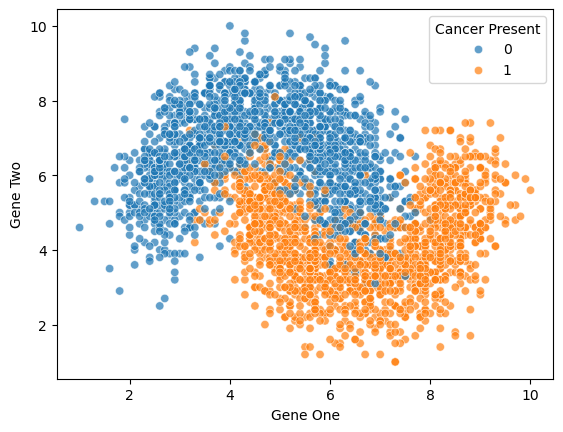

In [5]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7);

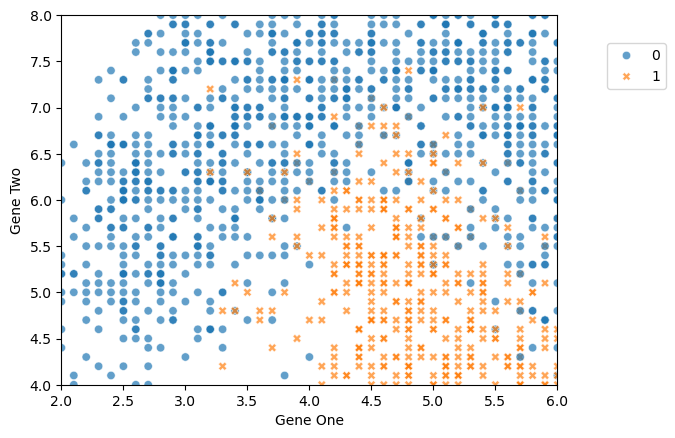

In [6]:
# Let's look at the overlapping points closely

sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7, style="Cancer Present")

plt.xlim(2,6)
plt.ylim(4,8)
plt.legend(loc=(1.1,0.8));

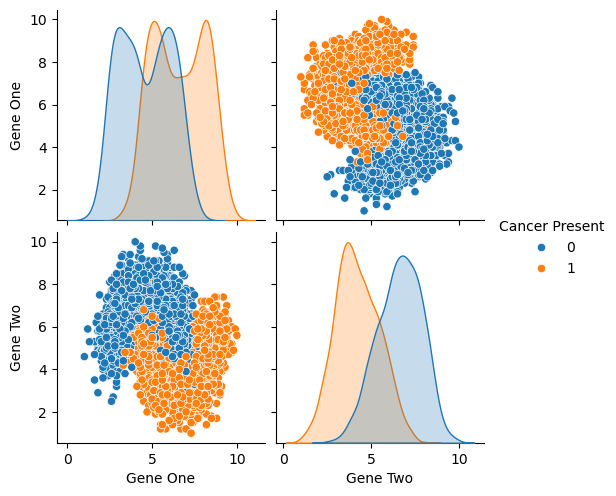

In [7]:
sns.pairplot(data=df, hue="Cancer Present");

## Train | Test Split and Scaling Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Always scale the data in KNN model
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## KNN Classification Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier 

# KNN model
knn_model = KNeighborsClassifier(n_neighbors=1)
# n_neighbors: Number of neighbors, int, default=5   

# Fit the model
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
# For details about algorithm see...
# help(KNeighborsClassifier)

## Model Evaluation

In [14]:
y_pred = knn_model.predict(scaled_X_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [16]:
accuracy_score(y_test,y_pred)

0.9011111111111111

In [17]:
confusion_matrix(y_test,y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [19]:
# To understand precision and recall in line with accuracy score check the data to see if it is balanced

df["Cancer Present"].value_counts()

# We have perfectly balanaced data

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

## Elbow Method to Choose Reasonable K Values

In [20]:
# Create a list to see the error rates  for different K's

test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [21]:
 test_error_rates

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

Text(0.5, 0, 'K Value')

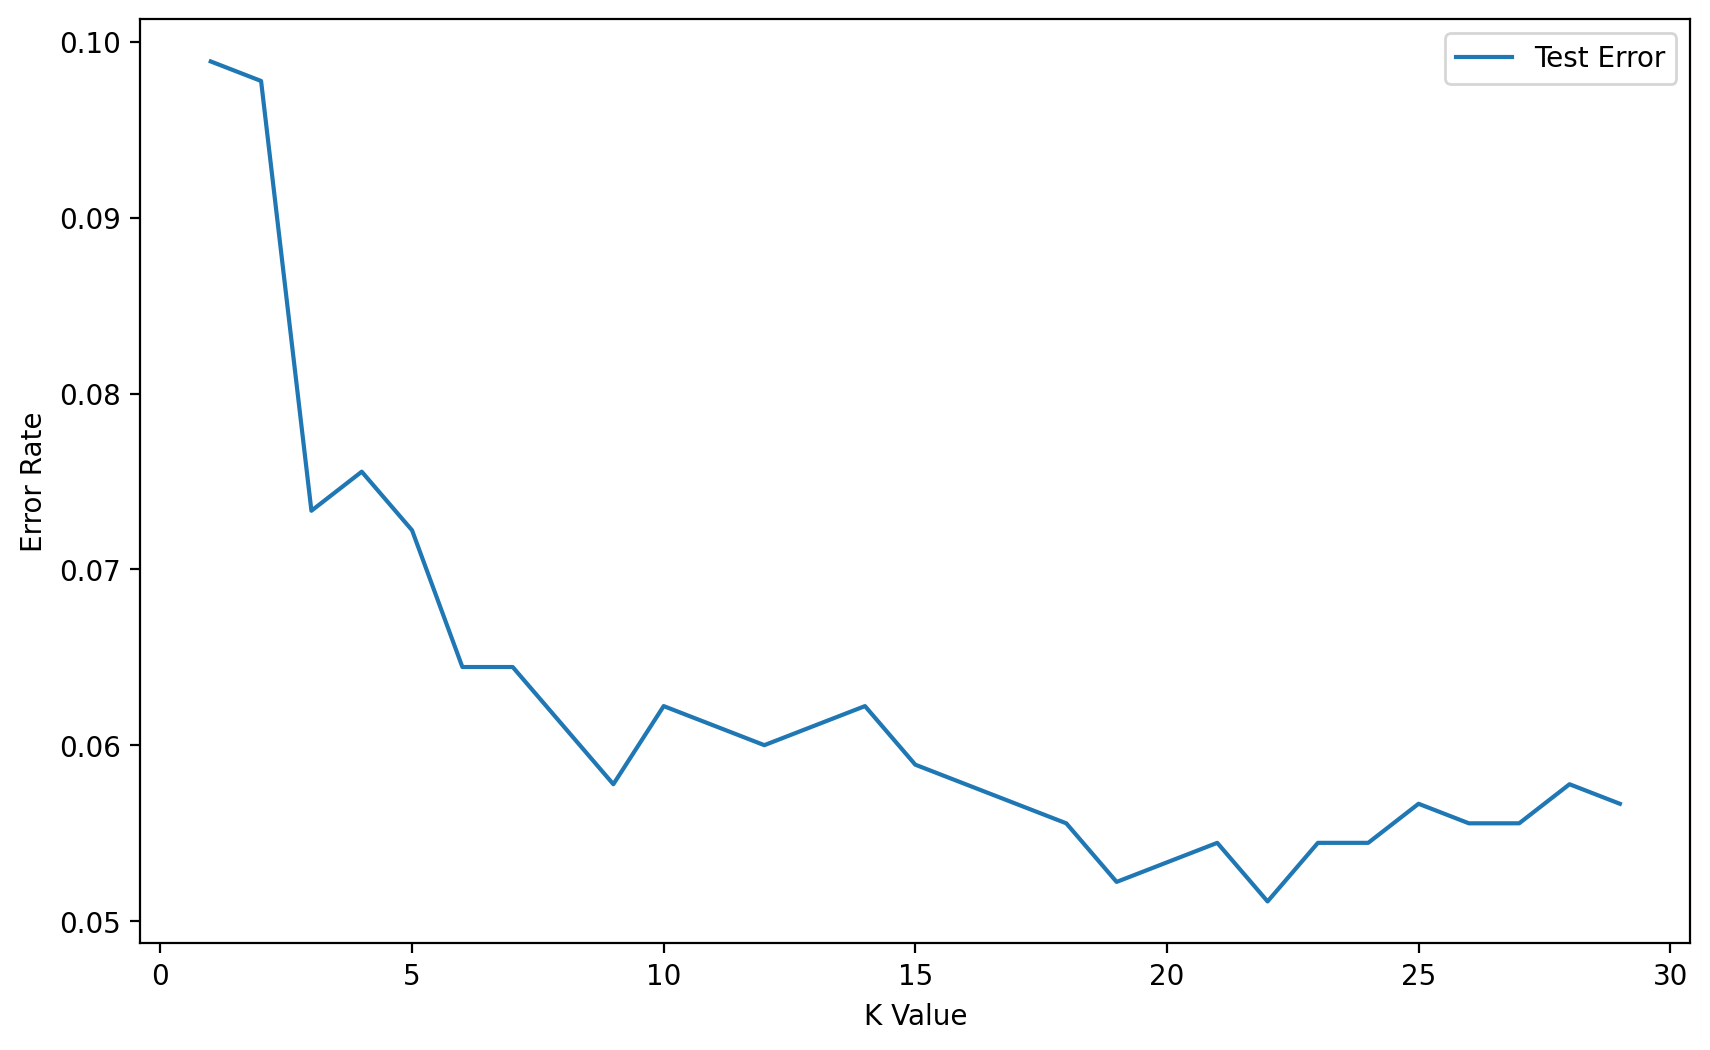

In [22]:
# Plot this K values and error rates

plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

## Cross-Validation Grid Search for K Value

<div class="alert alert-warning alert-info">
    
### <span style=" color:#bf2e98">Creating a Pipeline to find K value 

We'll use a Pipeline object to set up a workflow of operations:

1. Scale Data
2. Create Model on Scaled Data

**How does the Scaler work inside a Pipeline with CV? Is scikit-learn "smart" enough to understand .fit() on train vs .transform() on train and test?**

**Yes! Scikit-Learn's pipeline is well suited for this! [Full Info in Documentation](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)**

When you use the StandardScaler as a step inside a Pipeline then scikit-learn will internally do the job for you.

What happens can be discribed as follows:

* Step 0: The data are split into TRAINING data and TEST data according to the cv parameter that you specified in the GridSearchCV.
* Step 1: the scaler is fitted on the TRAINING data
* Step 2: the scaler transforms TRAINING data
* Step 3: the models are fitted/trained using the transformed TRAINING data
* Step 4: the scaler is used to transform the TEST data
* Step 5: the trained models predict using the transformed TEST data
</span>

**Pipeline --> GridSeacrh CV**

In [23]:
scaler = StandardScaler()

In [24]:
knn = KNeighborsClassifier()

In [25]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [26]:
# The string code has to match variable name!

operations = [('scaler',scaler),('knn',knn)]

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
pipe = Pipeline(operations)

In [29]:
from sklearn.model_selection import GridSearchCV

<div class="alert alert-block alert-success">
    
<span style=" color:red">

***Note:** If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:*

* chosen_string_name + **two** underscores + parameter key name
* model_name + __ + parameter name
* knn_model + __ + n_neighbors
* knn_model__n_neighbors

[StackOverflow on this](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline)

The reason we have to do this is because it lets scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler).
</span>

In [30]:
# help(knn)

In [31]:
k_values = list(range(1,20))

In [32]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [33]:
# model_name + __ + parameter name

param_grid = {'knn__n_neighbors': k_values}

In [34]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

# We do not need to scale data because pipeline does it

In [35]:
# Use full X and y if you DON'T want a hold-out test set
# Use X_train and y_train if you want a holdout test set (X_test,y_test)
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [36]:
# See the best estimator chosen 
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

It determined 16 as the K for this model (see 'knn__n_neighbors')

In [37]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [38]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.90380952, 0.90714286, 0.92142857, 0.91380952, 0.92380952,
       0.92047619, 0.92761905, 0.9252381 , 0.9247619 , 0.92285714,
       0.9252381 , 0.92428571, 0.92761905, 0.92809524, 0.92857143,
       0.93      , 0.92904762, 0.92857143, 0.92761905])

In [39]:
# There are 19 mean test scores
len(full_cv_classifier.cv_results_['mean_test_score'])

19

#### See the classification report with new K

In [40]:
full_pred = full_cv_classifier.predict(X_test)

In [41]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



#### Let's see one sample's prediction and check if it is tue

In [42]:
single_sample = X_test.iloc[28]
single_sample

Gene One    4.3
Gene Two    6.2
Name: 296, dtype: float64

In [55]:
# prediction
full_cv_classifier.predict(single_sample.values.reshape(1, -1))

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [44]:
# Its probability

full_cv_classifier.predict_proba(single_sample.values.reshape(1, -1))

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.4375, 0.5625]])

The model predicted it as class "1"; that is, cancer. However, we need to keep in mind that the probabilities of the classes are very close.

In [45]:
# What is the real class of the patient having these Gene values?

value_sample = df[(df['Gene One'] == 4.3 ) & (df['Gene Two'] == 6.2)]

value_sample

,Gene One,Gene Two,Cancer Present
296,4.3,6.2,0


When we find the related row from the data, we see that the actual class is 0.

## Final Model

We just saw that our GridSearch recommends a K=16 (check also Elbow Method). Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

In [47]:
scaler = StandardScaler()
knn16 = KNeighborsClassifier(n_neighbors=16) # K for 16
operations = [('scaler',scaler),('knn16',knn16)]

In [48]:
pipe = Pipeline(operations)

In [49]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn16', KNeighborsClassifier(n_neighbors=16))])

In [50]:
pipe_pred = pipe.predict(X_test)

In [51]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



### Predict new patient's condition

In [52]:
new_patient = [[3.8, 6.4]]

In [53]:
pipe.predict(new_patient)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [54]:
pipe.predict_proba(new_patient)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])

The model predicts the patient's condition as "0", that is no cancer. Also, it shows its probability as 100%. So, the model is sure that the new patient is not cancer.